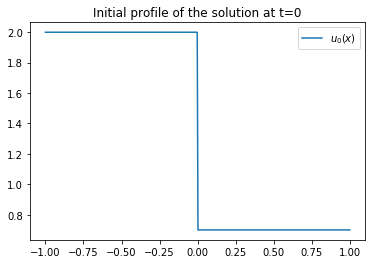

In [568]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi


a = -1
b = 1

def u0(x,ul,ur):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: ul, lambda x: ur])


def uexact(x,t,ul,ur):
    s=(ur+ul)/2
    return np.piecewise(x, [x < s*t, x >= s*t], [lambda x: ul, lambda x: ur])



def shock_speed_compute(u):
    du=np.diff(u)
    shock_indexes=np.where(du !=0 )
    #print(shock_indexes)
    il= shock_indexes[0][0]#index left of the shock
    ir= shock_indexes[0][-1]
    if (il==ir): #to fix. IF DU==O EVERYWHERE, THEN SET V=0
        v=0
    else:
        v=(0.5*u[il]**2 - 0.5*u[ir]**2)/(u[il]-u[ir])
        
    return v




x=np.linspace(a,b,400)
plt.plot(x,u0(x,2,0.7),'-',label='$u_0(x)$')
plt.title('Initial profile of the solution at t=0')
plt.legend()
plt.show()


In [693]:
def noncon_upwind(dx,dt,tf,ul,ur):
    nx=int(np.ceil((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    u=u0(x,ul,ur) #size N+1
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        
        for i in range(1,nx+1):#from x_1 to x_N
            u[i]=un[i]-(dt/dx)*un[i]*(un[i]-un[i-1])
        u[0]=u[1]
        t=t+dt
    return u


def conservative_upwind(dx,dt,tf,ul,ur):
    nx=int(np.ceil((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    u=u0(x,ul,ur) #size N+1
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        for i in range(1,nx+1):#from x_1 to x_N
            u[i]=un[i]-(dt/dx)*0.5*(un[i]**2-un[i-1]**2)
        u[0]=u[1]
        t=t+dt
    return u

nx=1111
dx=(b-a)/nx
dt=0.5*dx
tf=0.5
ul=1.2
ur=0.4
ShockSpeed=(ul+ur)/2

x=np.linspace(a,b,nx+1)
unc=noncon_upwind(dx,dt,tf,ul,ur)
ucon=conservative_upwind(dx,dt,tf,ul,ur)

Plot of solutions

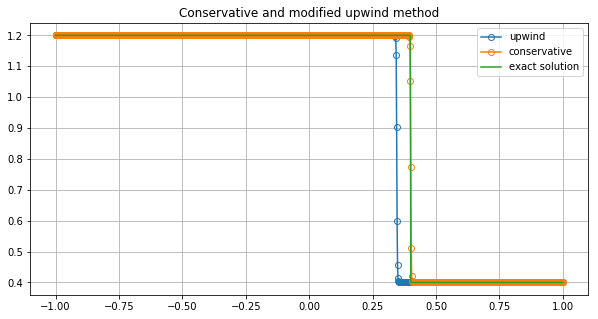

In [694]:
#plots
plt.figure(figsize=(10,5))
plt.plot(x,unc,'-o',markerfacecolor='none',label='upwind')
plt.plot(x,ucon,'-o',markerfacecolor='none',label='conservative')
plt.plot(x,uexact(x,tf,ul,ur),label='exact solution')
plt.legend()
plt.grid()
plt.title('Conservative and modified upwind method')
plt.show()

In [695]:
def shock_speed(u0,unc,ucon,x,ul,ur,Tol):
    #Non Conservative scheme velocity
    pos0=np.where(u0(x,ul,ur)==ur)[0][0]
    if (len(np.where(abs(unc-ur)<Tol))>0):
        fpos=np.where(abs(unc-ur)<Tol)[0][0]
        speedNC=(x[fpos-1]-x[pos0])/(tf)
        print(ucon[fpos])
    #print('Shock speed Non Conservative= ', speedNC)

    #Conservative scheme velocity
    if (len(np.where(abs(ucon-ur)<Tol))>0):
        fpos=np.where(abs(ucon-ur)<Tol)[0][0]
        speedCON=(x[fpos]-x[pos0])/(tf)
    #print('Shock speed conservative= ', speedCON)
    return speedNC, speedCON
    

Tol=0.1

########################################
def shock_speed(u0,unc,ucon,x,ul,ur):
    #Non Conservative scheme velocity
    pos0=np.where(u0(x,ul,ur)==ur)[0][0]
    duncon=np.where(np.diff(unc)!=0)[0]
    fpos=duncon[int(len(duncon)/2)]        
    #fpos=duncon[-1]
    speedNC=(x[fpos+1]-x[pos0])/(tf)

    #print('Shock speed Non Conservative= ', speedNC)
    pos0=np.where(u0(x,ul,ur)==ur)[0][0]
    ducon=np.where(np.diff(ucon)!=0)[0]
    #fpos=ducon[-1]
    fpos=ducon[int(len(ducon)/2)]
    #print(x[fpos])

    speedCON=(x[fpos]-x[pos0])/(tf)
    #print('Shock speed conservative= ', speedCON)
    return speedNC, speedCON


########################################
def shock_speed(u0,unc,ucon,x,ul,ur):
    p1=np.where(abs(unc-ul)<1e-3)[0][-1]
    #print(x[p1])
    p2=np.where(abs(unc-ur)<1e-3)[0][0]
    #print(x[p2])
    xf=(x[p1]+x[p2])/2
    #print(xf)
    
    speedNC=xf/tf
    
    
    #speedCON=(x[fpos]-x[pos0])/(tf)
    speedCON=2
    p1=np.where(abs(ucon-ul)<1e-3)[0][-1]
    #print(x[p1])
    p2=np.where(abs(ucon-ur)<1e-3)[0][0]
    #print(x[p2])
    xf=(x[p1]+x[p2])/2
    
    speedCON=xf/tf
    
    
    return speedNC, speedCON
    
vnc,vcon=shock_speed(u0,unc,ucon,x,ul,ur)
print('Analytical shock speed:',ShockSpeed)
print('\n Upwind shock speed:',vnc)
print('\n Cons upwind shock speed:',vcon)

Analytical shock speed: 0.8

 Upwind shock speed: 0.6930693069306928

 Cons upwind shock speed: 0.7992799279927991


Plots for different values of $h$

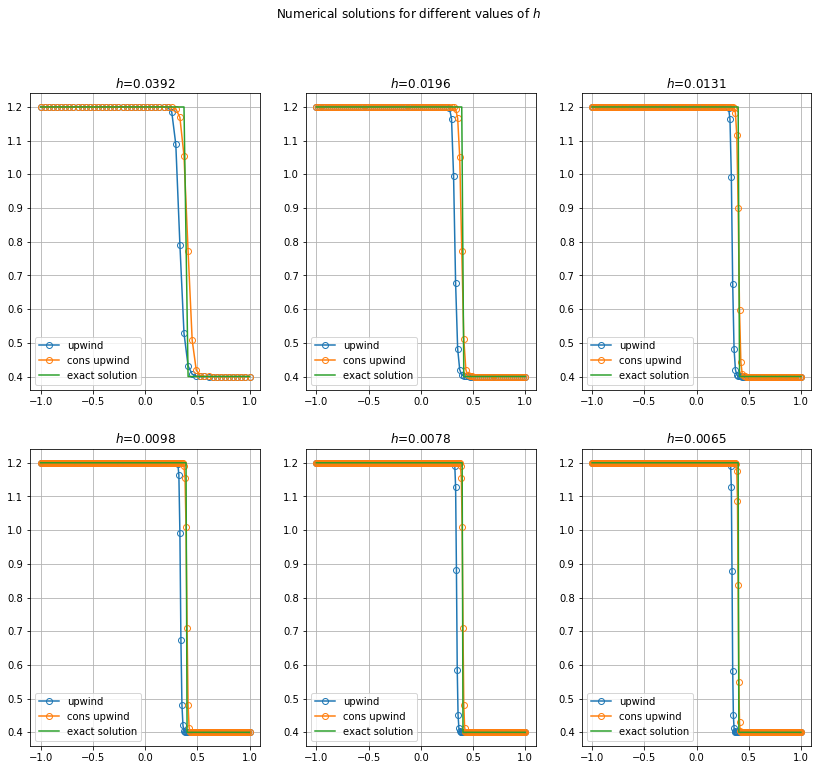

In [696]:
dxrange=2/(np.arange(51,351,51))
plt.figure(figsize=(14,12))
plt.suptitle('Numerical solutions for different values of $h$')
i=1

for dx in dxrange:
    dt=0.5*dx
    tf=0.5
    nx=int(np.ceil((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    unc=noncon_upwind(dx,dt,tf,ul,ur)
    ucon=conservative_upwind(dx,dt,tf,ul,ur)

    plt.subplot(2,3,i)
    plt.plot(x,unc,'-o',markerfacecolor='none',label='upwind')
    plt.plot(x,ucon,'-o',markerfacecolor='none',label='cons upwind')
    plt.plot(x,uexact(x,tf,ul,ur),label='exact solution')
    plt.title('$h$={}'.format(np.round(dx,4)))
    plt.legend()
    plt.grid()
    i=i+1

plt.show()

Computation of shock velocities

In [697]:
hrange=1/(np.arange(201,1001,101))

errNC=[]
errCON=[]
speedsNC=[]
speedsCON=[] 
for dx in hrange:
    dt=0.5*dx
    nx=np.floor((b-a)/dx).astype(int)
    x=np.linspace(a,b,nx+1)
    
    unc=noncon_upwind(dx,dt,tf,ul,ur)
    ucon=conservative_upwind(dx,dt,tf,ul,ur) #compute solutions
    
#    Tol=0.05
    
    spNC,spCON=shock_speed(u0,unc,ucon,x,ul,ur) #compute shock speeds 
    
    speedsNC.append(spNC) #store numerical shock velocities for each h
    speedsCON.append(spCON)
    
    errNC.append(abs(spNC- ShockSpeed)/abs(ShockSpeed)) #compute relative error
    errCON.append(abs(spCON-ShockSpeed)/abs(ShockSpeed))



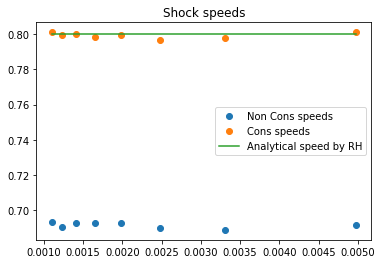

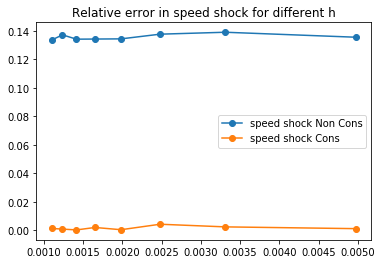

In [698]:
plt.figure()
plt.plot(hrange,speedsNC,'o',label='Non Cons speeds')
plt.plot(hrange,speedsCON,'o',label='Cons speeds')
plt.plot((min(hrange), max(hrange)), (ShockSpeed, ShockSpeed), '-',label='Analytical speed by RH')
plt.legend()
plt.title('Shock speeds')
plt.show()

plt.figure()
plt.plot(hrange,errNC,'-o',label='speed shock Non Cons')
plt.plot(hrange,errCON,'-o',label='speed shock Cons')
plt.legend()
plt.title('Relative error in speed shock for different h')
plt.show()